In [1]:
# Preparing the environment: see Project.toml and Manifest.toml

import Pkg

Pkg.activate(".")
Pkg.instantiate()

 Activating environment at `~/SWProj/Clients/Yandex/projects-2021/ww/ports-mapping-using-behavioral-vessel-data/dev_experiments/Project.toml`


In [2]:
Pkg.add("Luxor")
Pkg.add("Plots")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  100.0 %[===========>                             ]  25.7 %51.3 %===============================>         ]  77.0 %

  Resolving package versions...
No Changes to `~/SWProj/Clients/Yandex/projects-2021/ww/ports-mapping-using-behavioral-vessel-data/dev_experiments/Project.toml`
No Changes to `~/SWProj/Clients/Yandex/projects-2021/ww/ports-mapping-using-behavioral-vessel-data/dev_experiments/Manifest.toml`
  Resolving package versions...
No Changes to `~/SWProj/Clients/Yandex/projects-2021/ww/ports-mapping-using-behavioral-vessel-data/dev_experiments/Project.toml`
No Changes to `~/SWProj/Clients/Yandex/projects-2021/ww/ports-mapping-using-behavioral-vessel-data/dev_experiments/Manifest.toml`


# Full haversine vs. approximation for border status

In [3]:
using Plots
gr()

Plots.GRBackend()

In [4]:
R₀ = 6378.1

hav_lat(ϕ, δλ) = 2R₀ * asin(cos(ϕ * π / 180) * sin(δλ * π / 360))
approx_lat(ϕ, δλ) = R₀ * cos(ϕ * π / 180) * δλ * π / 180
error(ϕ, δλ) = 100 * abs(hav_lat(ϕ, δλ) - approx_lat(ϕ, δλ)) / hav_lat(ϕ, δλ)

plot(size=(400, 400))

plot!([ δλ -> error(ϕ, δλ) for ϕ in 0:20:84 ], 0, 6, 
    labels=permutedims([ "$(ϕ)°" for ϕ in 0:20:84 ]))

plot!(legend=:topleft)
plot!(xticks=(0:1:7, [ "$(i)°" for i in 0:1:7 ]))
plot!(yticks=(0:0.01:0.04, [ "$(i)%" for i in 0:0.01:0.04 ]))
plot!(xlabel="δλ, °")
plot!(ylabel="error, %")
plot!(title="Haversine vs. approximate distance along latitude line",
    titlefontsize=8)
savefig("border-distance-error.png")

# Illustrations

In [15]:
using Luxor
using Luxor: text, arrow

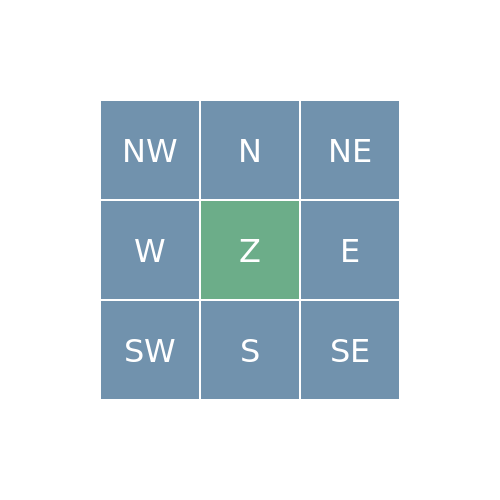

In [12]:
@png begin
    setopacity(0.7)    

    # Zone of interest
    setcolor(sethue("seagreen4")..., 0.7)
    box(Point(0, 0), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring zones: north
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(0, -100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()
    
    # Neighboring zones: south
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(0, 100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring zones: east
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(100, 0), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring zones: west
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(-100, 0), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring zones: north-west
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(-100, -100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring zones: north-east
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(100, -100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring zones: south-west
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(-100, 100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring zones: south-east
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(100, 100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    sethue("white")
    fontsize(32)

    text("Z", Point(0, 0), halign=:center, valign=:middle)
    text("N", Point(0, -100), halign=:center, valign=:middle)
    text("S", Point(0, 100), halign=:center, valign=:middle)
    text("E", Point(100, 0), halign=:center, valign=:middle)
    text("W", Point(-100, 0), halign=:center, valign=:middle)
    text("NW", Point(-100, -100), halign=:center, valign=:middle)
    text("NE", Point(100, -100), halign=:center, valign=:middle)
    text("SW", Point(-100, 100), halign=:center, valign=:middle)
    text("SE", Point(100, 100), halign=:center, valign=:middle)

end 500 500 "zones.png"

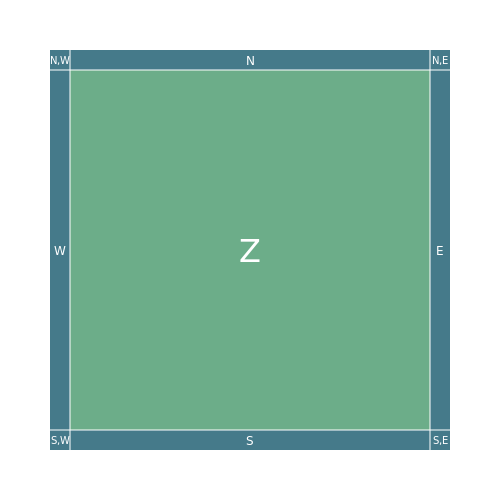

In [13]:
@png begin
    setopacity(0.7)
    setline(1)

    # Zone
    setcolor(sethue("seagreen4")..., 0.7)
    box(Point(0, 0), 400, 400, :fillpreserve)

    # Border zones
    setcolor(sethue("steelblue4")..., 0.7)
    rect(Point(180, -200), 20, 20, :fill)
    rect(Point(-200, -200), 20, 20, :fill)
    rect(Point(-200, 180), 20, 20, :fill)
    rect(Point(180, 180), 20, 20, :fill)
    
    rect(Point(180, -180), 20, 360, :fill)
    rect(Point(-200, -180), 20, 360, :fill)
    rect(Point(-180, -200), 360, 20, :fill)
    rect(Point(-180, 180), 360, 20, :fill)
    

    
    setopacity(1)
    setcolor("black")
    strokepath()
    
    # Border zones
    setcolor("white")

    line(Point(180, -200), Point(180, 200), :stroke)
    line(Point(-180, -200), Point(-180, 200), :stroke)
    line(Point(-200, 180), Point(200, 180), :stroke)
    line(Point(-200, -180), Point(200, -180), :stroke)

    fontsize(32)
    text("Z", Point(0, 0), halign=:center, valign=:middle)
    
    fontsize(12)
    text("E", Point(190, 0), halign=:center, valign=:middle)
    text("W", Point(-190, 0), halign=:center, valign=:middle)
    text("N", Point(0, -190), halign=:center, valign=:middle)
    text("S", Point(0, 190), halign=:center, valign=:middle)

    fontsize(10)
    text("N,W", Point(-190, -190), halign=:center, valign=:middle)
    text("N,E", Point(190, -190), halign=:center, valign=:middle)
    text("S,W", Point(-190, 190), halign=:center, valign=:middle)
    text("S,E", Point(190, 190), halign=:center, valign=:middle)
    
end 500 500 "borders.png"

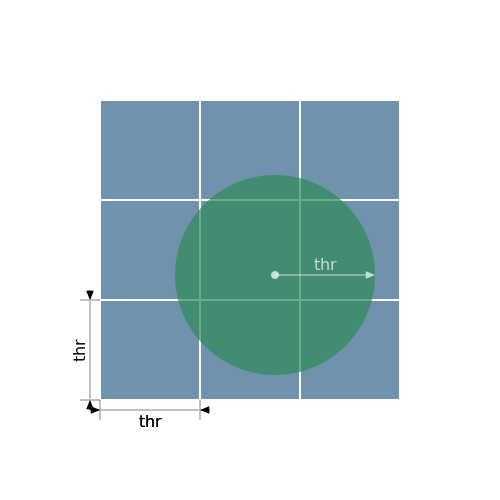

In [16]:
@png begin
    # Cell of interest
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(0, 0), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring cell: north
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(0, -100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()
    
    # Neighboring cell: south
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(0, 100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring cell: east
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(100, 0), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring cell: west
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(-100, 0), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring cell: north-west
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(-100, -100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring cell: north-east
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(100, -100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring cell: south-west
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(-100, 100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()

    # Neighboring cell: south-east
    setcolor(sethue("steelblue4")..., 0.7)
    box(Point(100, 100), 100, 100, :fillpreserve)
    setcolor("white")
    strokepath()


    # Location of interest
    fontsize(16)

    setcolor(sethue("seagreen4")..., 0.7)
    circle(Point(25, 25), 100, :fill)
    sethue("white")
    circle(Point(25, 25), 4, :fill)
    arrow(Point(25, 25), Point(125, 25))
    text("thr", Point(75, 20), halign=:center, valign=:bottom)
    
    # Horizontal dimensions
    setopacity(1)
    setcolor("black")
    setline(0.5)
    line(Point(-150, 150), Point(-150, 170), :stroke)
    line(Point(-50, 150), Point(-50, 170), :stroke)
    line(Point(-149, 160), Point(-51, 160), :stroke)
    arrow(Point(-160, 160), Point(-150, 160))
    arrow(Point(-40, 160), Point(-50, 160))
    text("thr", Point(-100, 165), halign=:center, valign=:top)    

    # Vertical dimensions
    line(Point(-150, 150), Point(-170, 150), :stroke)
    line(Point(-150, 50), Point(-170, 50), :stroke)
    line(Point(-160, 149), Point(-160, 51), :stroke)
    arrow(Point(-160, 160), Point(-160, 150))
    arrow(Point(-160, 40), Point(-160, 50))

    text("thr", Point(-100, 165), halign=:center, valign=:top)
    text("thr", Point(-165, 100), halign=:center, valign=:bottom, angle=3*π/2)
    end 500 500 "cells.png"